# Objective : is to predict the burned area (area) of forest fires based on the the spatial, temporal, and weather variables where the fire is spotted.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("forest_fires.csv")

In [4]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [57]:
for i in data.columns:
    print ("The unique values of {} is {}".format(i,len(data[i].unique())))
#Calculating the unique values of each column

The unique values of X is 9
The unique values of Y is 7
The unique values of month is 12
The unique values of day is 7
The unique values of FFMC is 106
The unique values of DMC is 215
The unique values of DC is 219
The unique values of ISI is 119
The unique values of temp is 192
The unique values of RH is 75
The unique values of wind is 21
The unique values of rain is 7
The unique values of area is 251


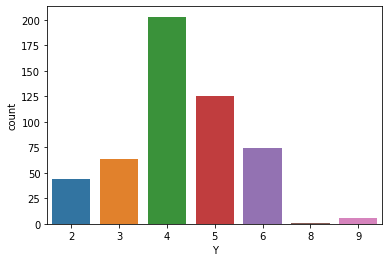

In [58]:
sns.countplot(data["Y"])
# some categories are predominant for some features i.e. for Y axis spatial coordinates 4 is more predominant

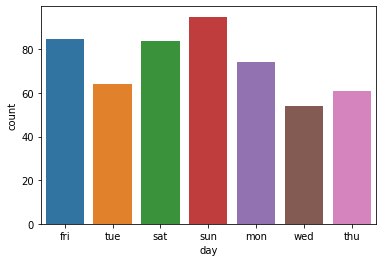

In [60]:
sns.countplot(data["day"])
# some categories are predominant for some features i.e. for day Sunday is more predominant

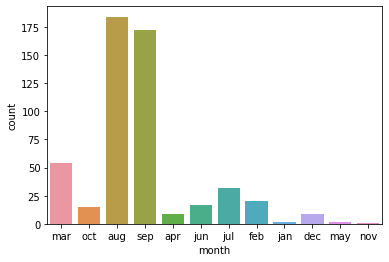

In [61]:
sns.countplot(data["month"])
# some categories are predominant for some features i.e. for month Aug and Sept is more predominant
#Might be because of summer months Forest fires are predominant

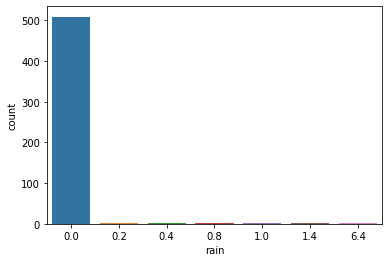

In [62]:
sns.countplot(data["rain"])
# some categories are predominant for some features i.e. rain is almost zero in most of the cases

In [7]:
data.shape
#Data set has 517 rows/observations with the target variable as area

(517, 13)

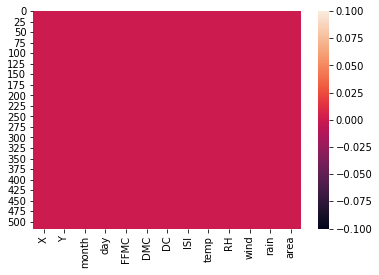

In [8]:
#missing values
sns.heatmap(data.isnull())
#Data set contains no missing values

Text(0.5, 0.98, 'Combined Forest Fire Attributes and their Correlation Heatmap')

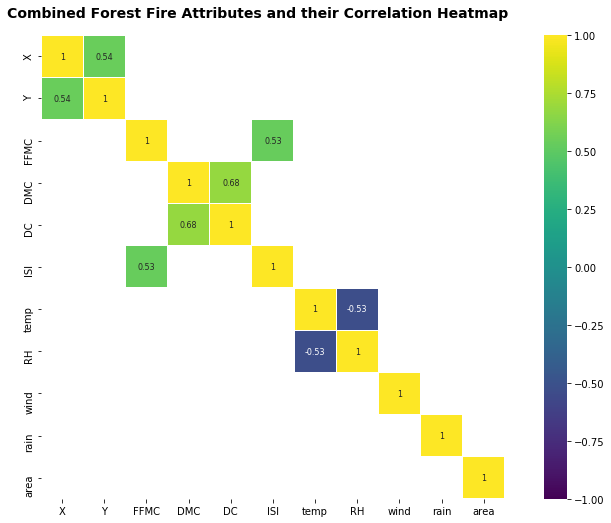

In [10]:
#Find correlation
fig, (ax) = plt.subplots(1, 1, figsize=(14,8))
#sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=2,cmap='PiYG')#'PiYG'#"bwr"
corr=data.corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
fig.subplots_adjust(top=0.93)
fig.suptitle('Combined Forest Fire Attributes and their Correlation Heatmap', fontsize=14, fontweight='bold')

# Feature to feature relationship
1.X and Y are positively correlated as both are spatial coordinates
2.Temp and Relative Humidity are negatively correlated

In [12]:
categorical_attributes = data.select_dtypes(include=['object']).columns.tolist()
print("categorical_attributes:",categorical_attributes)

categorical_attributes: ['month', 'day']


In [13]:
numerical_attributes = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("numerical attributes:" ,numerical_attributes)

numerical attributes: ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [27]:
#sns.set(rc={'figure.figsize': (14, 8)})
#sns.countplot(data["temp"])

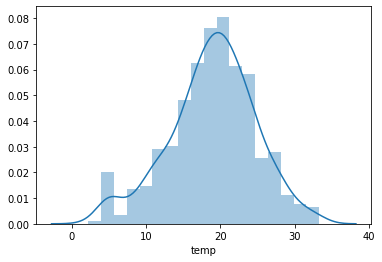

In [14]:
sns.distplot(data['temp'])

In [15]:
from scipy.stats import skew
skew(data['temp'])

-0.3302106140354586

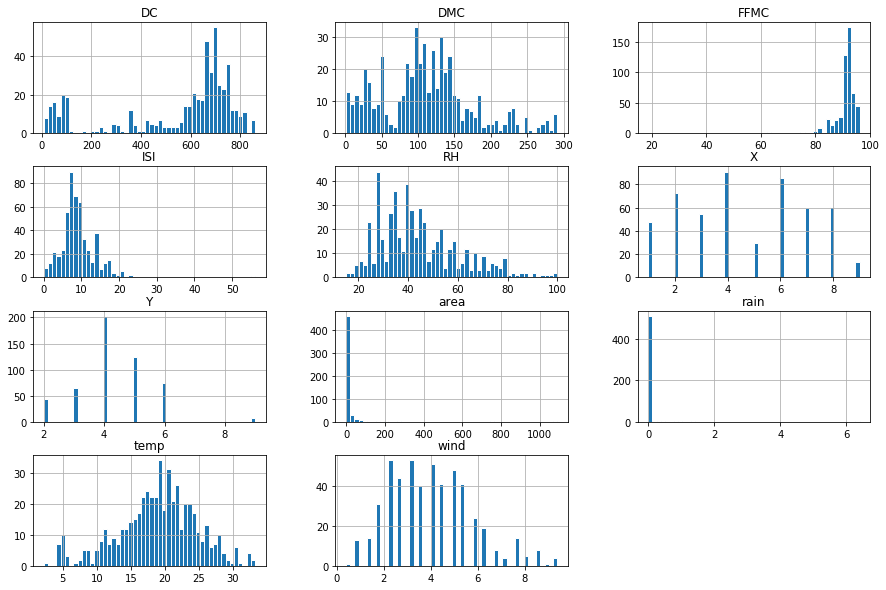

In [16]:
#visualizing distributions 
data.hist(bins=50, figsize=(15,10), ec='w')
plt.show()

#Use transformations such as log - log , square root etc to remove skewness
#Rain is left skewed
#FFMC is right skewed

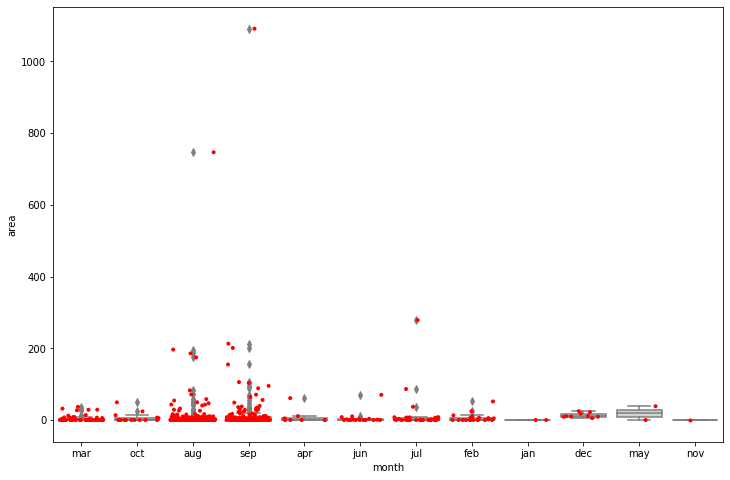

In [17]:
x = plt.figure(figsize=(12,8))
ax = sns.boxplot(x='month', y='area', data=data, color='lightgrey', )
ax = sns.stripplot(x='month', y='area', data=data, color='red', jitter=0.4, size=4)
##There are more incidents on summer months

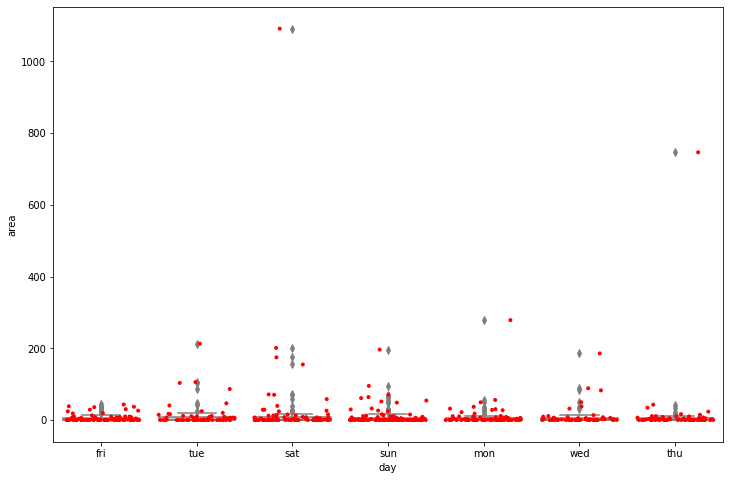

In [18]:
#There are more incidents on weekends - Friday/Sat/Sun, it might mean that campers vactioning might have caused/spotted fires.
ax = plt.figure(figsize=(12,8))
ax = sns.boxplot(x='day', y='area', data=data, color='lightgrey', )
ax = sns.stripplot(x='day', y='area', data=data, color='red', jitter=0.4, size=4)

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


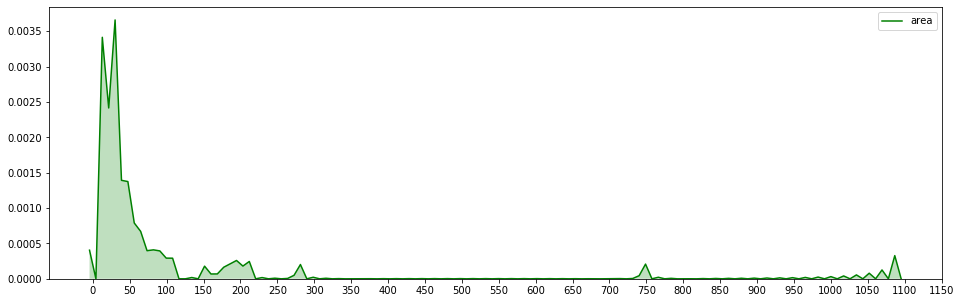

In [19]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(data['area'].skew()))
print("Kurtosis: {}".format(data['area'].kurtosis()))
ax = sns.kdeplot(data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

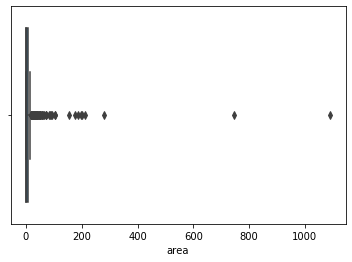

In [20]:
ax = sns.boxplot(data["area"])

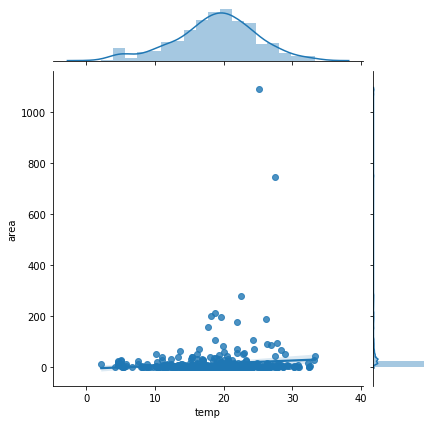

In [21]:
sns.jointplot(x='temp',y='area',data=data, kind='reg')

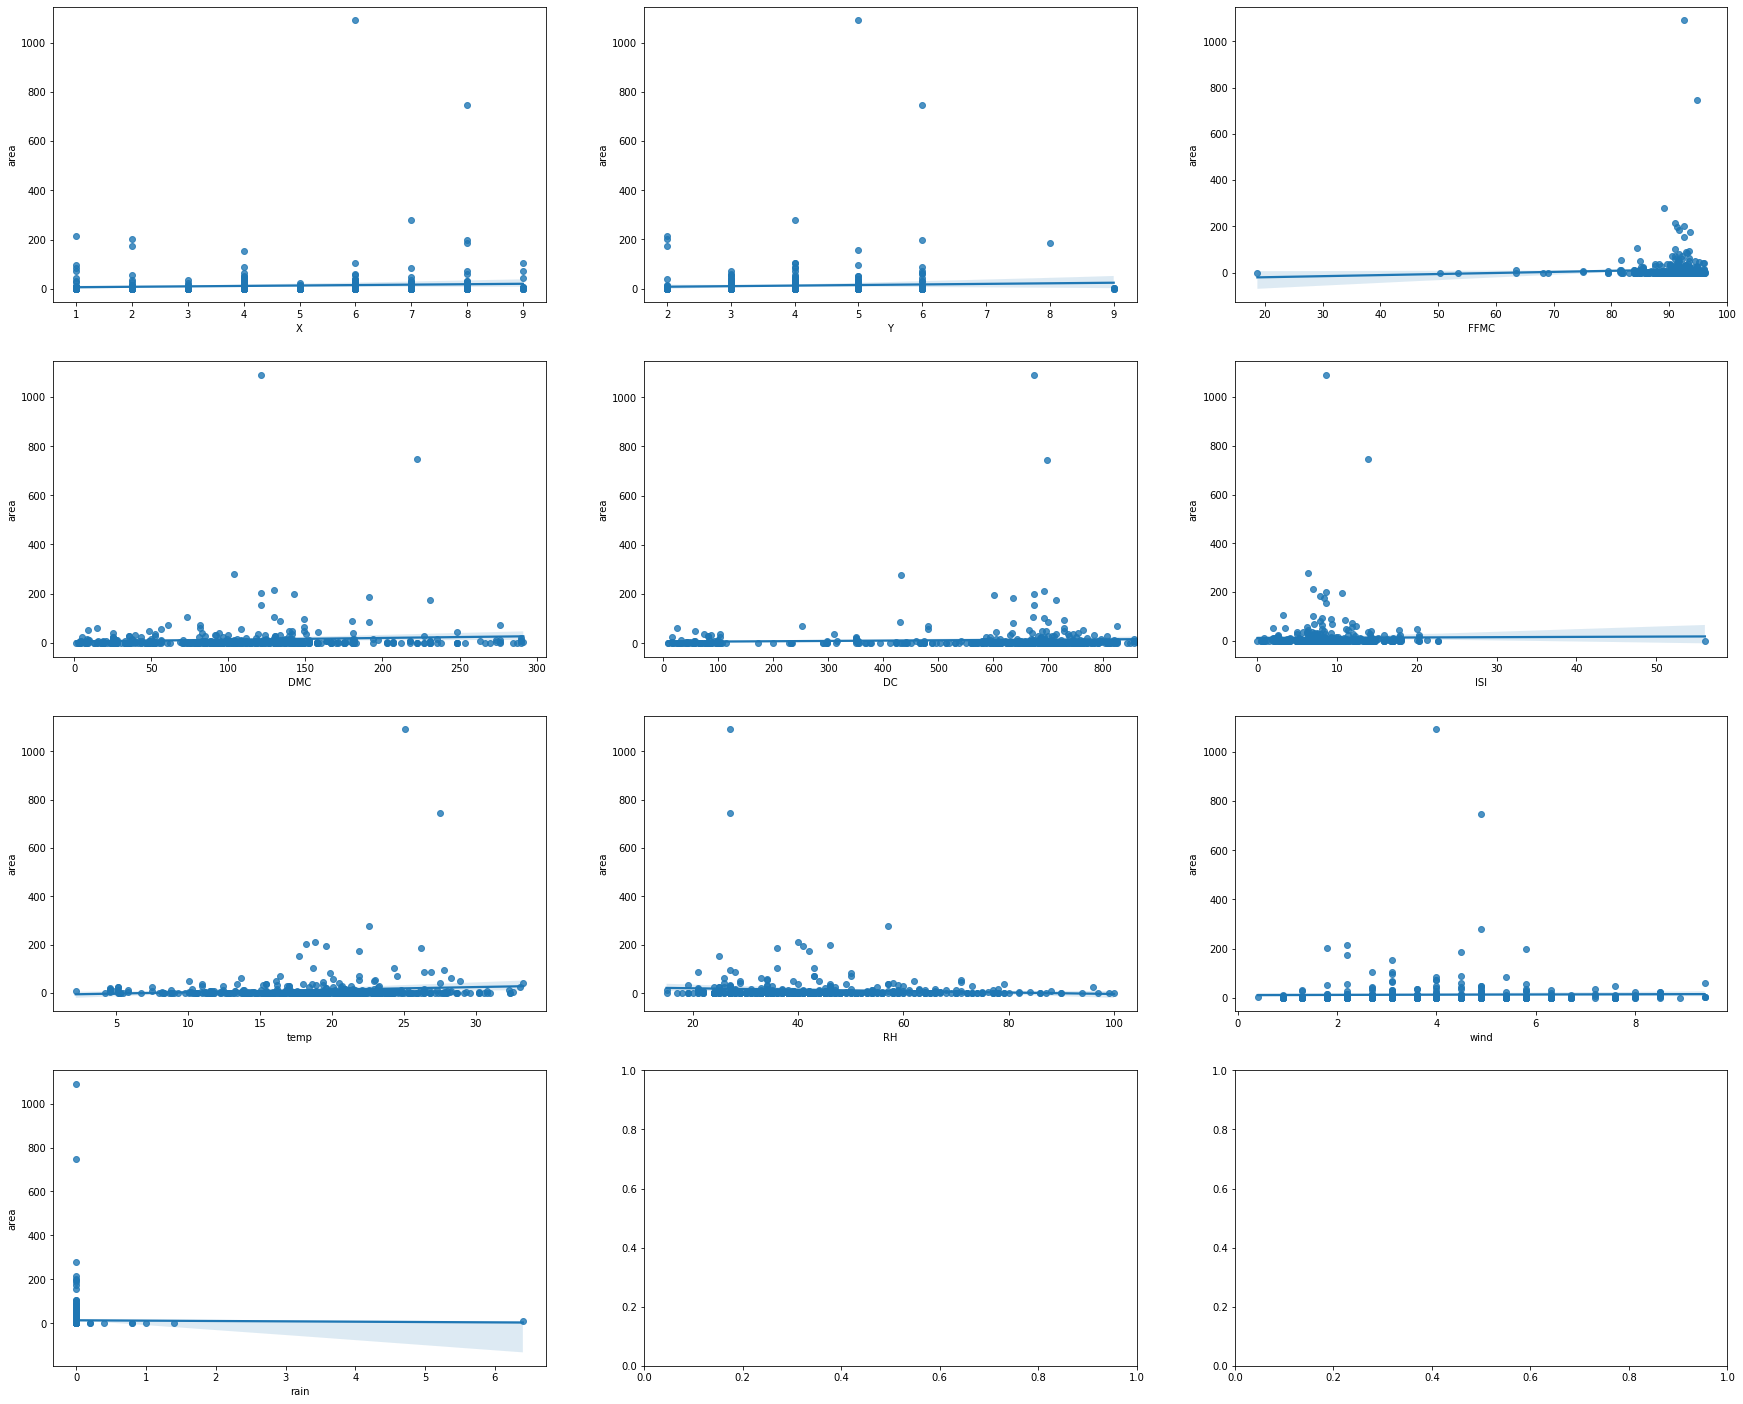

In [31]:
fig, ax = plt.subplots(round(len(numerical_attributes)/3),3, figsize = (30 ,25))

for i, ax in enumerate(fig.axes):
    if i < len(numerical_attributes) - 1:
        sns.regplot(x=numerical_attributes[i],y='area', data=data[numerical_attributes], ax=ax)